# Multiple Linear regression

Now, $i$th input has multiple elements, $x_j^{(i)}$, where $1 \leq j \leq d$ and $d$ is the number of features. The model can be represented as: $$f_{\vec{w},b}(\vec{x}) = \vec{w} \cdot \vec{x} + b$$
where $\vec{w} = \begin{bmatrix} w_1 & w_2 & \dots & w_d \end{bmatrix}$ is a vector consisting of parameters of the model.

Cost function with multiple variables $J(\vec{w},b)$ is:

$$J(\vec{w},b) = \dfrac{1}{2n} \sum_{i = 0}^{n-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2 $$ 

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pred_multireg(X,w,b):
    """
    Predicting valus for multiple regression:
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    
    Output:
    f_wb : (ndarray (n,)), Predicted target value for each observation
    """
    n = X.shape[0]
    f_wb = np.zeros(n)
    for i in range(n):
        f_wb[i] = np.dot(X[i],w) + b
    return f_wb

In [3]:
def cost_multireg(X,y,w,b):
    """
    Predicting valus for multiple regression:
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    
    Output:
    cost : (scalar), Cost of predicted values
    """
    
    n = X.shape[0]
    cost = 0
    for i in range(n):
        f_wb_i = np.dot(X[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/ (2*n)
    
    return cost

## Gradient descent for multiple regression
We will be applying gradient descent here by updating each $w_j$ and $b$ simultaneously, as follows:
$$
w_j = w_j -  \alpha \dfrac{\partial J(\vec{w},b)}{\partial w_j}\\
b= b -  \alpha \dfrac{\partial J(\vec{w},b)}{\partial b}
$$

Where the partial derivatives take the following values:
$$
\begin{align}
\dfrac{\partial J(\vec{w},b)}{\partial w_j}  &= \dfrac{1}{n} \sum_{i = 0}^{n-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\dfrac{\partial J(\vec{w},b)}{\partial b}  &= \dfrac{1}{n} \sum_{i = 0}^{n-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})
\end{align}
$$

Effectively, the gradient descent in this case is as follows:

$$
    w_1 \leftarrow w_1 - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})(x_1^{(i)}) \\
    \vdots\\
    w_d \leftarrow w_d - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})(x_d^{(i)})
$$
and $$b \leftarrow b - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})$$


In [4]:
def pdv_multireg(X,y,w,b):
    """
    Computes the partial derivatives for gradient descent with multiple variables
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    
    Output:
    dj_dw : (ndarray(d,)), Gradient of cost function w.r.t w
    dj-db : (scalar), Partial derivative of cost function w.r.t b
    """
    
    n,d = X.shape
    dj_dw = np.zeros(d,)
    dj_db = 0
    
    for i in range(n):
        for j in range(d):
            dj_dw[j] = dj_dw[j] + (np.dot(X[i],w) + b - y[i])*X[i,j]
        dj_db = dj_db + (np.dot(X[i],w) + b - y[i])
    
    dj_dw = dj_dw/n
    dj_db = dj_db/n
    
    return dj_dw,dj_db

In [20]:
def grad_desc_multireg(X, y, w_in, b_in, alpha, num):
    """
    Computes gradient descent for multiple regression
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w_in : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b_in : scalar, parameter
    alpha : learning rate
    num : (int), number of iterations
    
    Outputs: 
    w : final value of parameter after gradient descent
    b : final value of parameter after gradient descent
    J_hist : (list), cost values list
    """
    
    J_hist = []
    w = w_in
    b = b_in
    
    for i in range(num):
        dj_dw,dj_db = pdv_multireg(X,y,w,b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i<10000:
            J_hist.append(cost_multireg(X,y,w,b))
    
    return w,b,J_hist

## Working with example

### Simple example

In [128]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

cost = cost_multireg(X_train, y_train, w_init, b_init)

initial_w = np.zeros(4)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = grad_desc_multireg(X_train, y_train, initial_w, initial_b, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 


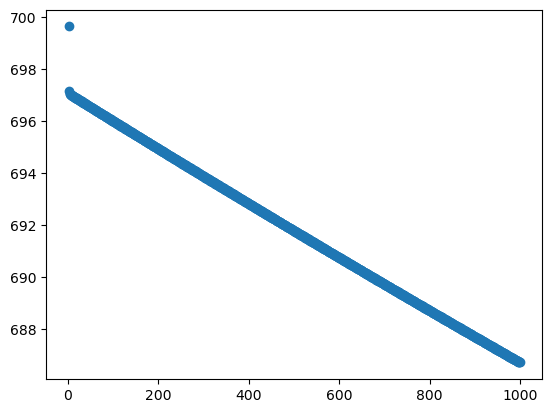

In [129]:
plt.scatter(x=np.arange(2,1000),y=J_hist[2:])

---
### Basketball data
Following is BasketBall data gathered for 2018-19 season :  
GP : Games played  
MPG : Minutes per game  
FG : Field goal percentage  
3P : Three pointers percentage  
FT : Free throws percentage  
PPG : Points per game  
Salary : Approx (in million $)  


| PlayerName             | Team            | GP   | MPG   | FG   | 3P   | FT    | PPG    | Salary   |
| -----------------------|-----------------|------|-------|------|------|-------|--------|----------|
| Stephen Curry,PG       | Warriors        | 69   | 33.8  | 0.472| 0.437| 0.916 | 27.3   | 37.457   |
| LeBron James,SF        | Lakers          | 55   | 35.2  | 0.510| 0.339| 0.665 | 27.4   | 35.654   |
| Nikola Vucevic         | Magic           | 80   | 31.4  | 0.518| 0.364| 0.789 | 20.8   | 12.750   |
| Klay Thompson          | Warriors        | 78   | 34.0  | 0.467| 0.402| 0.816 | 21.5   | 18.988   |
| James Johnson          | Heat            | 55   | 21.2  | 0.433| 0.336| 0.714 | 7.8    | 14.651   |
| Zach Lavine            | Bulls           | 63   | 34.5  | 0.467| 0.374| 0.832 | 23.7   | 19.500   |
| Nikola Jokic,C         | Nuggets         | 80   | 31.3  | 0.511| 0.307| 0.821 | 20.1   | 24.605   |
| CJ McCollum,SG         | Blazers         | 70   | 33.9  | 0.459| 0.375| 0.828 | 21.0   | 25.759   |
| Chris Paul,PG          | Rockets         | 58   | 32.0  | 0.419| 0.358| 0.862 | 15.6   | 36.654   |
| Blake Griffins,PF      | Pistons         | 75   | 35.0  | 0.463| 0.362| 0.753 | 24.5   | 32.088   |
| Steven Adams,C         | Thunder         | 80   | 33.4  | 0.595| 0.000| 0.500 | 13.9   | 24.157   |
| Robin Lopez,C          | Bulls           | 74   | 21.7  | 0.568| 0.226| 0.724 | 9.5    | 14.357   |
| Kelly Olynyk,PF        | Heat            | 79   | 22.9  | 0.463| 0.354| 0.822 | 10.0   | 12.537   |
| John Leuer,F           | Pistons         | 41   | 9.8   | 0.584| 0.091| 0.742 | 3.8    | 10.002   |

In [22]:
df = pd.read_csv("basketball_data.csv")
df

,PlayerName,Team,GP,MPG,FG,3P,FT,PPG,Salary
0,"Stephen Curry,PG",Warriors,69,33.8,0.472,0.437,0.916,27.3,37.457
1,"LeBron James,SF",Lakers,55,35.2,0.510,0.339,0.665,27.4,35.654
2,Nikola Vucevic,Magic,80,31.4,0.518,0.364,0.789,20.8,12.750
3,Klay Thompson,Warriors,78,34.0,0.467,0.402,0.816,21.5,18.988
4,James Johnson,Heat,55,21.2,0.433,0.336,0.714,7.8,14.651
5,Zach Lavine,Bulls,63,34.5,0.467,0.374,0.832,23.7,19.500
6,"Nikola Jokic,C",Nuggets,80,31.3,0.511,0.307,0.821,20.1,24.605
7,"CJ McCollum,SG",Blazers,70,33.9,0.459,0.375,0.828,21.0,25.759
8,"Chris Paul,PG",Rockets,58,32.0,0.419,0.358,0.862,15.6,36.654
9,"Blake Griffins,PF",Pistons,75,35.0,0.463,0.362,0.753,24.5,32.088


In [103]:
X_train_2 = df[df.columns[2:8]].to_numpy()
y_train_2 = df[df.columns[8]].to_numpy()
w_init_2 = np.zeros(6)
b_init_2 = 0
alpha_2 = 0.0003
num_iters_2 = 5000

w_final_2, b_final_2, J_hist_2 = grad_desc_multireg(X_train_2, y_train_2, w_init_2, b_init_2, alpha_2, num_iters_2)


In [105]:
f_wb_2 = pred_multireg(X_train_2,w_final_2,b_final_2)
J_hist_2[-10:]

[17.780102492463048,
 17.780026792367188,
 17.779951094663986,
 17.779875399353347,
 17.779799706435178,
 17.77972401590937,
 17.779648327775817,
 17.779572642034445,
 17.779496958685126,
 17.779421277727778]

In [106]:
df["predicted_salary"] = f_wb_2

In [107]:
df

,PlayerName,Team,GP,MPG,FG,3P,FT,PPG,Salary,predicted_salary
0,"Stephen Curry,PG",Warriors,69,33.8,0.472,0.437,0.916,27.3,37.457,27.809340
1,"LeBron James,SF",Lakers,55,35.2,0.510,0.339,0.665,27.4,35.654,32.696907
2,Nikola Vucevic,Magic,80,31.4,0.518,0.364,0.789,20.8,12.750,22.393548
3,Klay Thompson,Warriors,78,34.0,0.467,0.402,0.816,21.5,18.988,26.168176
4,James Johnson,Heat,55,21.2,0.433,0.336,0.714,7.8,14.651,15.418374
5,Zach Lavine,Bulls,63,34.5,0.467,0.374,0.832,23.7,19.500,30.171345
6,"Nikola Jokic,C",Nuggets,80,31.3,0.511,0.307,0.821,20.1,24.605,22.303031
7,"CJ McCollum,SG",Blazers,70,33.9,0.459,0.375,0.828,21.0,25.759,27.892365
8,"Chris Paul,PG",Rockets,58,32.0,0.419,0.358,0.862,15.6,36.654,28.399756
9,"Blake Griffins,PF",Pistons,75,35.0,0.463,0.362,0.753,24.5,32.088,27.997809


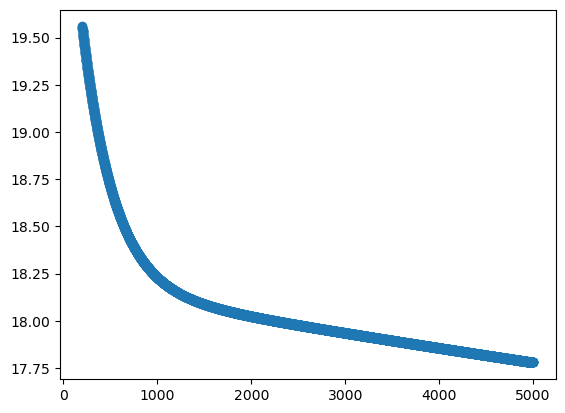

In [115]:
plt.scatter(x=np.arange(200,5000),y=J_hist_2[200:])